## Create a plot from low dim. data

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from skimage import exposure
import matplotlib.colors as colors

In [3]:
objects = []
with (open("/Users/joaohenrique/Documents/Estagio_EPFL/joao_pose/results/15h38m_27_03_2019/tsne_results.pickle", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

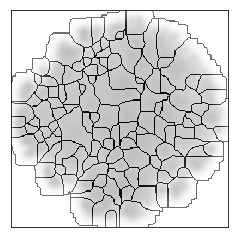

In [4]:
area_dict = objects[0]
low_dim = area_dict['2D_tsne_map']
plt.imshow(low_dim, cmap='Greys')
frame = plt.gca()
frame.patch.set_visible(False)
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [5]:
area_dict.keys()

dict_keys(['area1', 'area2', 'area3', 'area4', 'area5', 'area6', 'area7', 'area8', 'area9', 'area10', 'area11', 'area12', 'area13', 'area14', 'area15', 'area16', 'area17', 'area18', 'area19', 'area20', 'area21', 'area22', 'area23', 'area24', 'area25', 'area26', 'area27', 'area28', 'area29', 'area30', 'area31', 'area32', 'area33', 'area34', 'area35', 'area36', 'area37', 'area38', 'area39', 'area40', 'area41', 'area42', 'area43', 'area44', 'area45', 'area46', 'area47', 'area48', 'area49', 'area50', 'area51', 'area52', 'area53', 'area54', 'area55', 'area56', 'area57', 'area58', 'area59', 'area60', 'area61', 'area62', 'area63', 'area64', 'area65', 'area66', 'area67', 'area68', 'area69', 'area70', 'area71', 'area72', 'area73', 'area74', 'area75', 'area76', 'area77', 'area78', 'area79', 'area80', 'area81', 'area82', 'area83', 'area84', 'area85', 'area86', 'area87', 'area88', 'area89', 'area90', 'area91', 'area92', 'area93', 'area94', 'area95', 'area96', 'area97', 'area98', 'area99', 'area100

In [6]:
def area_video_frames(area, frame_list):
    # frame_list is area_dict
    l = frame_list[f'area{area}']
    x = list()
    y = list()
    n_exp = len(l.keys())
    for i in range(n_exp):
        seq_list = list(list(l.values())[i])
        n_seq = len(seq_list)
        k = 1
        o = 1
        for j in range(n_seq):
            if list(list(l.values())[i])[j][0:3] == 'seq':
                x_pos = list(l.values())[i][f'sequence_{k}']['x']
                y_pos = list(l.values())[i][f'sequence_{k}']['y']
                x.append(x_pos*400)
                y.append(y_pos*400)
                k += 1
            if list(list(l.values())[i])[j][0:3] == 'out':
                x_pos = list(l.values())[i][f'outlier_{o}']['x']
                y_pos = list(l.values())[i][f'outlier_{o}']['y']
                x.append(x_pos*400)
                y.append(y_pos*400)
                o += 1
    x = np.concatenate(x)
    y = np.concatenate(y)
    return x, y

In [154]:
len(tx)/900

53.803333333333335

In [152]:
data_ld = np.stack([tx, ty]).reshape(2,len(tx))

In [92]:
def map_mesh(low_dim_data, xmax, ymax):
    # frame the x,y coordinates from the low dimensional data.
    mesh = np.zeros(shape=(xmax, ymax))
    point_idx_to_pix = dict()
    pix_to_point_idx = dict()
    for x in range(xmax):
        for y in range(ymax):
            pix_to_point_idx[(x,y)] = list()
    for idx, p in enumerate(low_dim_data):
        x, y = p[0], p[1]
        if x<0 or x>xmax or y<0 or y>ymax:
            continue
        mesh[x, y] += 1
        pix_to_point_idx[(x,y)].append(idx) #each entry(x,y) in this dict is the index of the frame
        point_idx_to_pix[idx] = (x,y) #each entry(frame) in this dict is the postition of the pixel

    return mesh, pix_to_point_idx, point_idx_to_pix

In [125]:
all_points, pix_to_point_idx , point_idx_to_pix = map_mesh(np.transpose(data_ld), 400, 400)

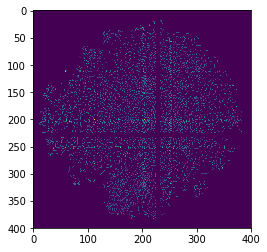

In [126]:
plt.imshow(all_points)

In [49]:
tx = []; ty = []
areas = [54, 83, 85, 98, 31, 36, 45, 46, 100, 51]
for a in range(len(areas)):
    x, y = area_video_frames(areas[a], area_dict)
    x = [int(i) for i in x]
    y = [int(i) for i in y]
    tx.append(x)
    ty.append(y)
tx = np.concatenate(tx)
ty = np.concatenate(ty)

mesh_groom = np.zeros(shape=(400,400))
for i in range(len(tx)):
    mesh_groom[tx[i],ty[i]]+=1
    
# Apply 2D Gaussian Convolution
s = 5 #kernel size
pdf = gaussian_filter(mesh_groom, s, order=0, output=None, 
                      mode='nearest', cval=0.0, truncate=4.0)

pdf = exposure.adjust_gamma(pdf, 0.3)
c = pdf.sum()
npdf1 = pdf*(1/c)
# mask
s = .8 #kernel size
pdf = gaussian_filter(mesh_groom, s, order=0, output=None, 
                      mode='nearest', cval=0.0, truncate=4.0)

pdf = exposure.adjust_gamma(pdf, 0.3)
c = pdf.sum()
mask_groom = pdf*(1/c)

In [50]:
tx = []; ty = []
areas = [109, 122, 99, 126]
for a in range(len(areas)):
    x, y = area_video_frames(areas[a], area_dict)
    x = [int(i) for i in x]
    y = [int(i) for i in y]
    tx.append(x)
    ty.append(y)
tx = np.concatenate(tx)
ty = np.concatenate(ty)

mesh_fwdwk = np.zeros(shape=(400,400))
for i in range(len(tx)):
    mesh_fwdwk[tx[i],ty[i]]+=1

# Apply 2D Gaussian Convolution
s = 5 #kernel size
pdf = gaussian_filter(mesh_fwdwk, s, order=0, output=None, 
                      mode='nearest', cval=0.0, truncate=4.0)

pdf = exposure.adjust_gamma(pdf, 0.3)
c = pdf.sum()
npdf1 = pdf*(1/c)
# mask
s = .8 #kernel size
pdf = gaussian_filter(mesh_fwdwk, s, order=0, output=None, 
                      mode='nearest', cval=0.0, truncate=4.0)

pdf = exposure.adjust_gamma(pdf, 0.3)
c = pdf.sum()
mask_fwdwk = pdf*(1/c)

In [117]:
tx = []; ty = []
areas = [4, 23, 26, 8]
for a in range(len(areas)):
    x, y = area_video_frames(areas[a], area_dict)
    x = [int(i) for i in x]
    y = [int(i) for i in y]
    tx.append(x)
    ty.append(y)
tx = np.concatenate(tx)
ty = np.concatenate(ty)

mesh_bps = np.zeros(shape=(400,400))
for i in range(len(tx)):
    mesh_bps[tx[i],ty[i]]+=1

# Apply 2D Gaussian Convolution
s = 5 #kernel size
pdf = gaussian_filter(mesh_bps, s, order=0, output=None, 
                      mode='nearest', cval=0.0, truncate=4.0)

pdf = exposure.adjust_gamma(pdf, 0.3)
c = pdf.sum()
npdf1 = pdf*(1/c)
# mask
s = .8 #kernel size
pdf = gaussian_filter(mesh_bps, s, order=0, output=None, 
                      mode='nearest', cval=0.0, truncate=4.0)

pdf = exposure.adjust_gamma(pdf, 0.3)
c = pdf.sum()
mask_bps = pdf*(1/c)

In [118]:
tx = []; ty = []
areas = [101, 84, 76, 65, 73, 94]
for a in range(len(areas)):
    x, y = area_video_frames(areas[a], area_dict)
    x = [int(i) for i in x]
    y = [int(i) for i in y]
    tx.append(x)
    ty.append(y)
tx = np.concatenate(tx)
ty = np.concatenate(ty)

mesh_others = np.zeros(shape=(400,400))
for i in range(len(tx)):
    mesh_others[tx[i],ty[i]]+=1

# Apply 2D Gaussian Convolution
s = 5 #kernel size
pdf = gaussian_filter(mesh_others, s, order=0, output=None, 
                      mode='nearest', cval=0.0, truncate=4.0)

pdf = exposure.adjust_gamma(pdf, 0.3)
c = pdf.sum()
npdf1 = pdf*(1/c)
# mask
s = .8 #kernel size
pdf = gaussian_filter(mesh_others, s, order=0, output=None, 
                      mode='nearest', cval=0.0, truncate=4.0)

pdf = exposure.adjust_gamma(pdf, 0.3)
c = pdf.sum()
mask_others = pdf*(1/c)

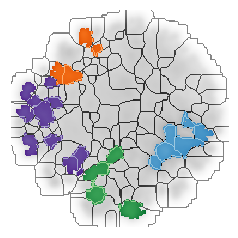

<Figure size 432x288 with 0 Axes>

In [121]:
from numpy.ma import masked_array
v1 = .04*npdf1+low_dim
v1a = masked_array(v1,mask_groom>low_dim)
v1b = masked_array(v1,mask_groom<=low_dim)
v1c = masked_array(v1,mask_fwdwk<=low_dim)
v1d = masked_array(v1,mask_bps<=low_dim)
v1e = masked_array(v1,mask_others<=low_dim)
fig,ax = plt.subplots()
pa = ax.imshow(v1a,interpolation='nearest',cmap='Greys')
pb = ax.imshow(v1b,interpolation='nearest',norm=colors.LogNorm(vmin=v1b.min()/1.3, vmax=v1b.max()*5),cmap='Purples_r')
pc = ax.imshow(v1c,interpolation='nearest',norm=colors.LogNorm(vmin=v1b.min()/2, vmax=v1b.max()*5),cmap='Greens_r')
pd = ax.imshow(v1d,interpolation='nearest',norm=colors.LogNorm(vmin=v1b.min()/3, vmax=v1b.max()*5),cmap='Oranges_r')
pd = ax.imshow(v1e,interpolation='nearest',norm=colors.LogNorm(vmin=v1b.min()/1.9, vmax=v1b.max()*5),cmap='Blues_r')
ax.axis('off')
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.show()
plt.savefig("low_dim_clusters.svg", format="svg")

In [89]:
# Apply 2D Gaussian Convolution
s = 5 #kernel size
pdf = gaussian_filter(mesh, s, order=0, output=None, 
                      mode='nearest', cval=0.0, truncate=4.0)

pdf = exposure.adjust_gamma(pdf, 0.3)
c = pdf.sum()
npdf1 = pdf*(1/c)
# mask
s = .8 #kernel size
pdf = gaussian_filter(mesh, s, order=0, output=None, 
                      mode='nearest', cval=0.0, truncate=4.0)

pdf = exposure.adjust_gamma(pdf, 0.3)
c = pdf.sum()
mask = pdf*(1/c)

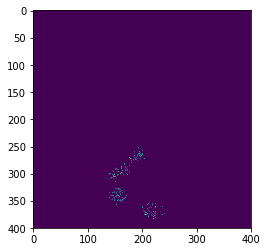

In [35]:
plt.imshow(mesh_fwdwk)

In [24]:
x, y = area_video_frames(54, area_dict)
x = [int(i) for i in x]
y = [int(i) for i in y]

mesh = np.zeros(shape=(400,400))
for i in range(len(x)):
    mesh[x[i],y[i]]+=1

In [ ]:
plt.figure(figsize=[6, 6])
x = np.arange(0, 100, 0.00001)
y = x*np.sin(2* np.pi * x)
plt.plot(y)
plt.axis('off')
plt.gca().set_position([0, 0, 1, 1])
plt.savefig("test.svg")